In [1]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
file_path="/Users/anishjain/Downloads/daily-total-female-births.csv"
df=pd.read_csv(file_path)  # read the data set
print(df.head())  # starting 5 rows 
print(df.tail())  # ending 5 rows
print(df.size)    # size
print(df.shape)   # no of rows and columns

print(df.describe())  #  describe the columns 
print(df.columns)

         Date  Births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44
           Date  Births
360  1959-12-27      37
361  1959-12-28      52
362  1959-12-29      48
363  1959-12-30      55
364  1959-12-31      50
730
(365, 2)
           Births
count  365.000000
mean    41.980822
std      7.348257
min     23.000000
25%     37.000000
50%     42.000000
75%     46.000000
max     73.000000
Index(['Date', 'Births'], dtype='object')


In [17]:
df1 = pd.DataFrame()
import numpy as np
df1['ds'] = pd.to_datetime(df['Date'])
df1['y'] = df['Births']
df1['orig']=df1['y']
df1['y']=np.log(df1['y'])
df1.head()

,ds,y,orig
0,1959-01-01,3.555348,35
1,1959-01-02,3.465736,32
2,1959-01-03,3.401197,30
3,1959-01-04,3.433987,31
4,1959-01-05,3.784190,44


In [18]:
m=Prophet()
m.fit(df1)

16:43:02 - cmdstanpy - INFO - Chain [1] start processing
16:43:02 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future = m.make_future_dataframe(periods=12 * 5,
                                 freq='M')

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower',
          'yhat_upper', 'trend',
          'trend_lower', 'trend_upper']].head()



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,1959-01-01,3.674204,3.470952,3.882311,3.643531,3.643531,3.643531
1,1959-01-02,3.648674,3.453245,3.848861,3.643818,3.643818,3.643818
2,1959-01-03,3.622156,3.411791,3.829951,3.644105,3.644105,3.644105
3,1959-01-04,3.569328,3.374696,3.765874,3.644392,3.644392,3.644392
4,1959-01-05,3.623067,3.433055,3.815157,3.644679,3.644679,3.644679


In [20]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower',
          'yhat_upper', 'trend',
          'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
420,1964-08-31,3.003827,1.920162,4.090471,3.025439,1.963601,4.096805
421,1964-09-30,3.051599,1.910848,4.162885,3.012541,1.929609,4.120337
422,1964-10-31,2.977265,1.836303,4.112088,2.999214,1.888817,4.127044
423,1964-11-30,2.964703,1.798553,4.131407,2.986316,1.847109,4.148698
424,1964-12-31,3.003661,1.788033,4.203449,2.972988,1.810729,4.160959


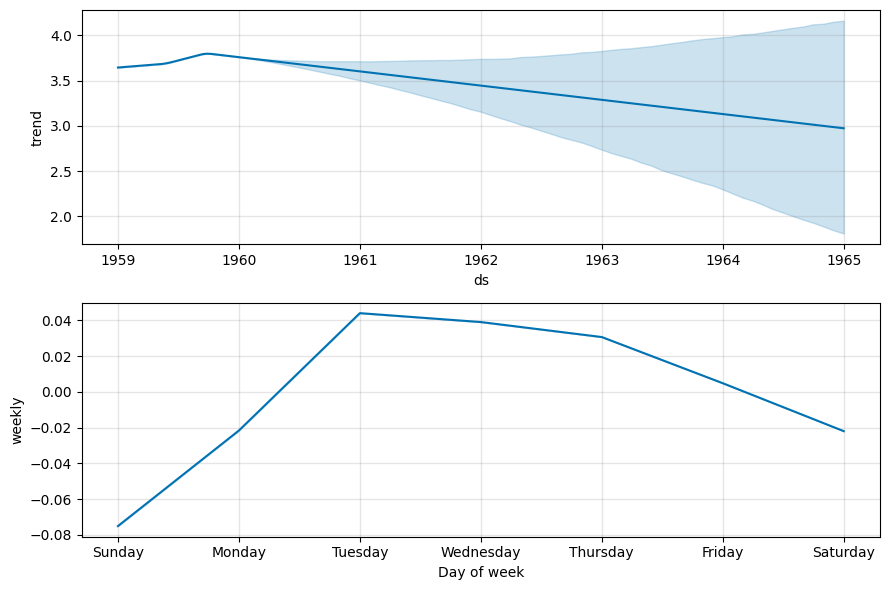

In [23]:
fig2 = m.plot_components(forecast)

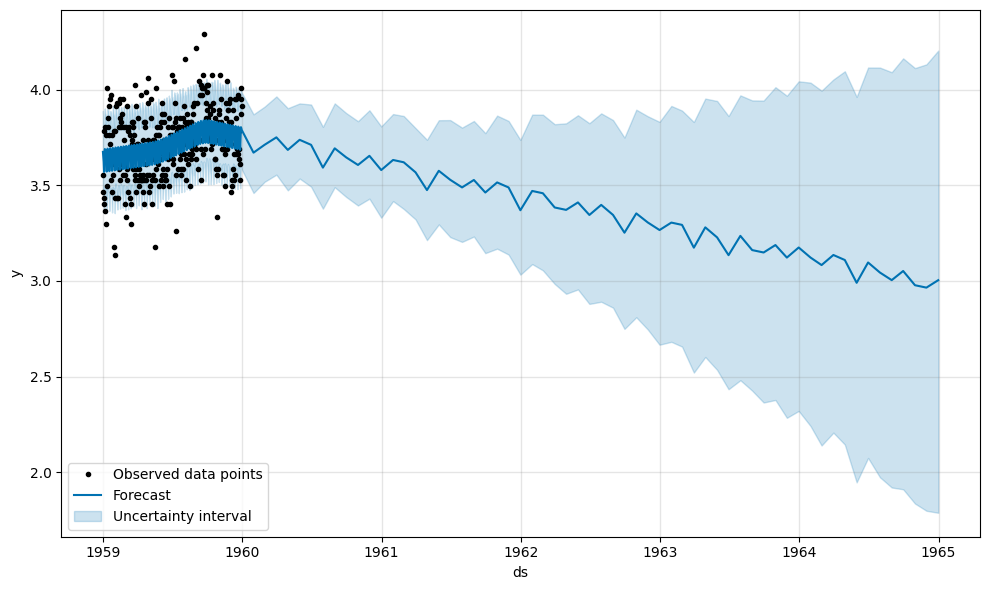

In [24]:
fig1 = m.plot(forecast, include_legend=True)

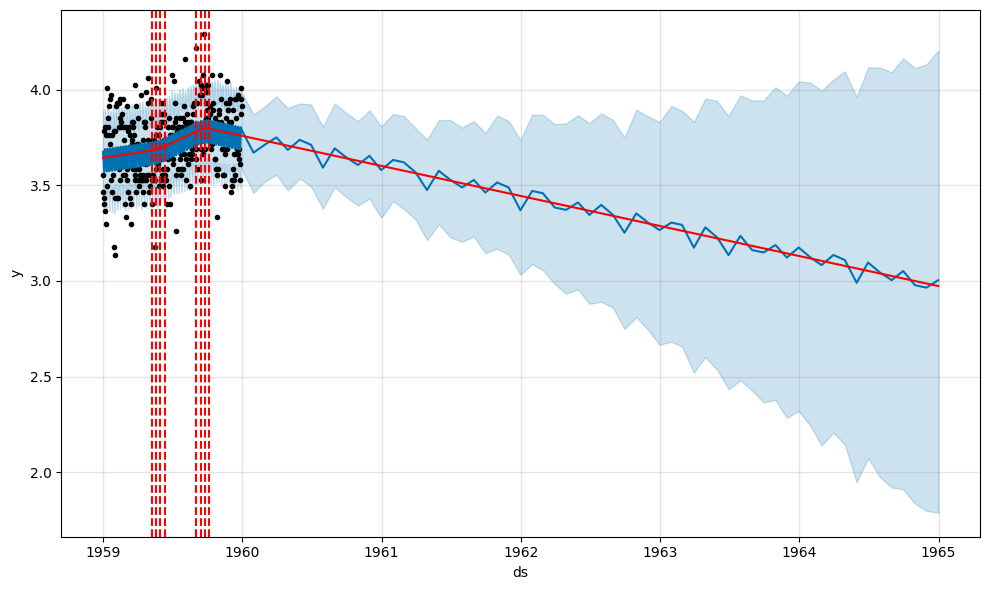

In [25]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),
                             m, forecast)

In [21]:
import numpy as np
actual = df1['y']  # Replace with actual values
predicted = forecast['yhat'][:len(actual)]  # Predicted values
mape = np.mean(np.abs((actual - predicted) / actual)) * 100
print(f"MAPE: {mape:.2f}%")


MAPE: 3.44%


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae = mean_absolute_error(actual,predicted)
print(mae)
rmse = np.sqrt(mean_squared_error(actual,predicted))
rmse

0.12745103512183856


np.float64(0.160800915204505)

In [26]:
#Perform Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller


def adf_test(series):
    result = adfuller(series.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary")

print("Stationarity Test on Original Data:")
adf_test(df1['y'])


Stationarity Test on Original Data:
ADF Statistic: -4.353173151882321
p-value: 0.0003588965449025539
Critical Values: {'1%': np.float64(-3.44880082033912), '5%': np.float64(-2.869670179576637), '10%': np.float64(-2.5711012838861036)}
Data is stationary


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 133.824
Date:                Tue, 11 Feb 2025   AIC                           -261.647
Time:                        17:02:19   BIC                           -249.956
Sample:                             0   HQIC                          -257.001
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1495      0.055      2.700      0.007       0.041       0.258
ma.L1         -0.9666      0.017    -57.953      0.000      -0.999      -0.934
sigma2         0.0279      0.002     14.235      0.0

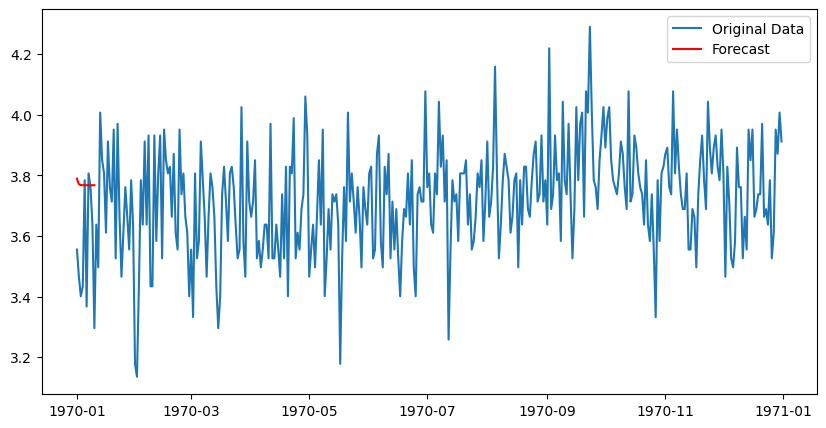

In [33]:
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df1['y'], order=(1,1,1))  # Example order, you may need to tune it
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast next 10 steps
forecast = model_fit.forecast(steps=10)
print("\nForecasted Values:\n", forecast)

# Plot the forecast
plt.figure(figsize=(10,5))
plt.plot(df1.index, df1['y'], label='Original Data')
plt.plot(pd.date_range(df1.index[-1], periods=10, freq='D'), forecast, label='Forecast', color='red')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ensure 'actual' and 'forecast' have the same length
actual = df1['y'].iloc[-10:].values  # Last 10 actual values
forecast = model_fit.forecast(steps=10)  # Forecasted values

# Compute MAE and RMSE
mae = mean_absolute_error(actual, forecast)
rmse = np.sqrt(mean_squared_error(actual, forecast))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 0.14239186859404923
Root Mean Squared Error (RMSE): 0.15663307648801103
